<a href="https://colab.research.google.com/github/lcnychh/da_nychh/blob/master/DA_Unit3_L3%264_07242020_Part2_LC_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 - COVID-19 Data Analysis**

**The Data Background**

The following is noted from the datasource link:

The New York Times is releasing a series of data files with **cumulative counts** of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak.

Since late January, The Times has tracked cases of coronavirus in real time as they were identified after testing. Because of the widespread shortage of testing, however, the data is necessarily limited in the picture it presents of the outbreak.

The data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020.

The Times are providing two sets of data with cumulative counts of coronavirus cases and deaths: one with most current numbers for each geography and another with **historical data showing the tally for each day for each geography.**

The historical data files are at the top level of the directory and contain data up to, but not including the current day. The live data files are in the live/ directory.

A key difference between the historical and live files is that the numbers in the **historical files are the final counts at the end of each day**, while the live files have figures that may be a partial count released during the day but cannot necessarily be considered the final, end-of-day tally.

Each row of data reports the cumulative number of coronavirus cases and deaths based on our best reporting up to the moment we publish an update. Our counts include both laboratory confirmed and probable cases using criteria that were developed by states and the federal government. Not all geographies are reporting probable cases and yet others are providing confirmed and probable as a single total.

**State and county files contain FIPS codes, a standard geographic identifier**, to make it easier for an analyst to combine this data with other data sets like a map file or population data.

**Please note: The historical data is used for this analysis (not the live data).**



**Research Questions**

Please note: Since New York Times data is updated daily, answers are based on data ran as of 7/27/2020, 12:52am (date of completion of project).

Research Question - 1 - Insight into raw data - How many records/ columns? There are 7,989 rows and 5 columns.

Research Question - 2 - Was there subsetting data by state? Yes, subset is New York.

Research Question - 3 - Were new columns added? Yes, since cases and deaths are cumulative, new cases, new deaths, percent change per day were created.

Research Question - 4 - Were visuals/ plots/ graphs/ figures used? Yes, Pandas functions were used to pivot the dataframe to get the month-wise case count for New York.

Research Question - 5 - Were other libraries used? Yes, plotly library was explored in order to make interactive plots/ graphs.

The following libraries were imported:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

**All States data for Covid-19**

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


^As noted, the data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020.

In [ ]:
df.shape

(7989, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

^There are 7,989 datapoints and 5 features in the dataframe as of 7/27/20.

**New York data for Covid-19**

In [ ]:
ny_df = df[df['state']=='New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


^First case in New York is on March 1, 2020.

In [ ]:
ny_df.shape

(147, 5)

^There are 147 columns and 5 columns for the New York subset.

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
7747,2020-07-21,New York,36,412889,32218
7802,2020-07-22,New York,36,413595,32228
7857,2020-07-23,New York,36,414405,32270
7912,2020-07-24,New York,36,415163,32278
7967,2020-07-25,New York,36,415911,32295


^As of July 25, 2020, there are 415,911 cases and 32,295 deaths.

In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


^First death in New York is on March 14, 2020 with 610 cases accumulated up to that day.

In [ ]:
#total number of cases
ny_df['cases'].max()

415911

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

39483337

**Data Wrangling - extracting and adding new variables**

Adding new_cases column

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


**Performing analysis by month**

Case date is added in order to add month variable

In [ ]:
ny_df['case_date'] = pd.to_datetime(ny_df['date'])
ny_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,state,fips,cases,deaths,new_cases,case_date
246,2020-03-01,New York,36,1,0,1,2020-03-01
261,2020-03-02,New York,36,1,0,0,2020-03-02
276,2020-03-03,New York,36,2,0,1,2020-03-03
293,2020-03-04,New York,36,11,0,9,2020-03-04
313,2020-03-05,New York,36,22,0,11,2020-03-05


In [ ]:
ny_df['date'].dtype

dtype('O')

In [ ]:
ny_df['case_date'].dtype

dtype('<M8[ns]')

In [ ]:
ny_df.shape

(147, 7)

In [ ]:
pd.DatetimeIndex(ny_df['case_date']).month

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='case_date', length=147)

In [ ]:
ny_df['month'] = pd.DatetimeIndex(ny_df['case_date']).month
ny_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,state,fips,cases,deaths,new_cases,case_date,month
246,2020-03-01,New York,36,1,0,1,2020-03-01,3
261,2020-03-02,New York,36,1,0,0,2020-03-02,3
276,2020-03-03,New York,36,2,0,1,2020-03-03,3
293,2020-03-04,New York,36,11,0,9,2020-03-04,3
313,2020-03-05,New York,36,22,0,11,2020-03-05,3


Summary of new cases by month

In [ ]:
ny_df.pivot_table(index='month',values='new_cases',aggfunc='sum')

,new_cases
month,
3,76211
4,233485
5,65879
6,22567
7,17769


In [ ]:
ny_df.groupby('month')['new_cases'].sum()

month
3     76211
4    233485
5     65879
6     22567
7     17769
Name: new_cases, dtype: int64

In [ ]:
ny_monthly_data =  ny_df.pivot_table(index='month',values='new_cases',aggfunc='sum')
ny_monthly_data.head()

,new_cases
month,
3,76211
4,233485
5,65879
6,22567
7,17769


Index is reset

In [ ]:
ny_monthly_data = ny_monthly_data.reset_index()
ny_monthly_data

,month,new_cases
0,3,76211
1,4,233485
2,5,65879
3,6,22567
4,7,17769


Adding variable for percentage change for new cases

In [ ]:
ny_monthly_data['new_cases'].pct_change()

0         NaN
1    2.063665
2   -0.717845
3   -0.657448
4   -0.212611
Name: new_cases, dtype: float64

In [ ]:
# (233485 - 76211)/ 76211 * 100

In [ ]:
ny_monthly_data['case_percent_change'] = round((ny_monthly_data['new_cases'].pct_change())* 100,2)
ny_monthly_data

,month,new_cases,case_percent_change
0,3,76211,NaN
1,4,233485,206.37
2,5,65879,-71.78
3,6,22567,-65.74
4,7,17769,-21.26


In [ ]:
import plotly.express as px

**Exploratory Data Analysis**

In [ ]:
fig = px.bar(ny_monthly_data,x='month',y='case_percent_change')
fig.show()

^April shows the biggest percentage increase in new cases, then falls drastically in May and continues to taper in the following months.

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths,new_cases,case_date,month
246,2020-03-01,New York,36,1,0,1,2020-03-01,3
261,2020-03-02,New York,36,1,0,0,2020-03-02,3
276,2020-03-03,New York,36,2,0,1,2020-03-03,3
293,2020-03-04,New York,36,11,0,9,2020-03-04,3
313,2020-03-05,New York,36,22,0,11,2020-03-05,3


In [ ]:
import plotly.graph_objects as go

In [ ]:
# Create figure
fig_ny = go.Figure()

fig_ny.add_trace(
    go.Scatter(x=list(ny_df.date), y=list(ny_df.new_cases)))

# Set title
fig_ny.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig_ny.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_ny.show()



^April was the peak of the pandemic with the highest new cases to date at over 12,000 in a day. New cases are declining thereafter and stabilizing to below 2000 to date.

In [ ]:
my_list = [12,34,56,'apple',23.99]

In [ ]:
my_list

[12, 34, 56, 'apple', 23.99]

In [ ]:
my_list.append('Furhan')

In [ ]:
my_list

[12, 34, 56, 'apple', 23.99, 'Furhan']

In [ ]:
my_list.insert(2,'Mary')

In [ ]:
my_list

[12, 34, 'Mary', 56, 'apple', 23.99, 'Furhan']

In [ ]:
my_list[-3:]

['apple', 23.99, 'Furhan']

In [ ]:
ny_df['new_cases'].sum()

415911

In [ ]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

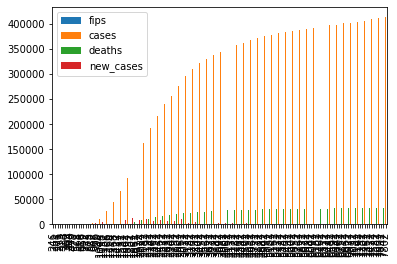

In [ ]:
ny_df.plot(kind='bar')

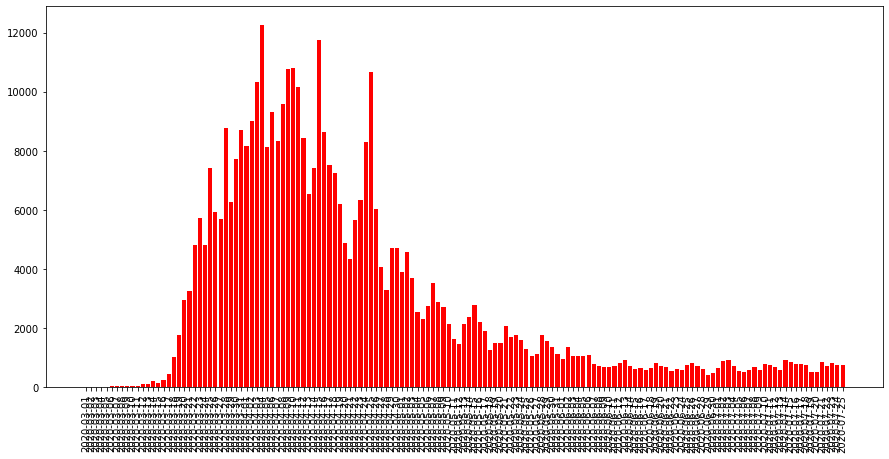

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

^Cases began in New York on March 1, 2020 and peaked in April at over 12,000. Then tapered off in May to current at under 2000.

New York data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

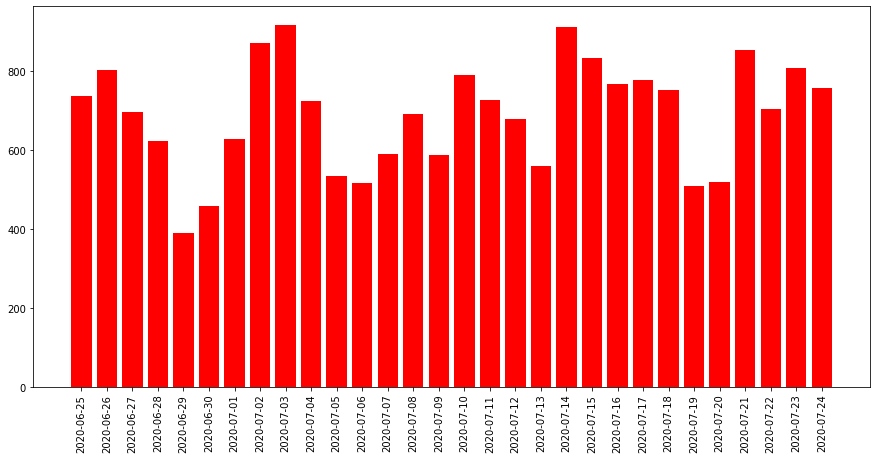

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

^At a closer look, in the last 30 days, new cases range up to 900 as compared to the peak in April reaching over 12,000 one day.

In [ ]:
states = ['New York', 'California','Florida', 'Texas','Arizona']


Comparing New York to other states, CA, FL, TX, AZ

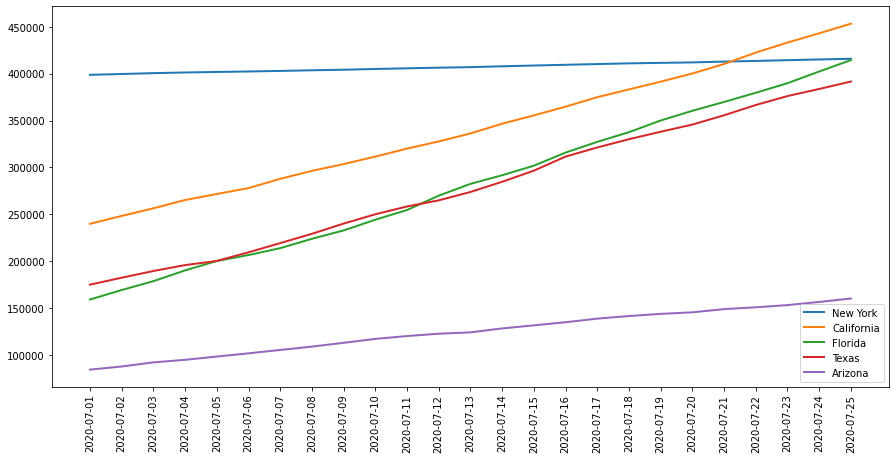

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


The cases in NY remain to be flat in July while CA, FL, TX, and AZ show an increase in cases, with CA surpassing NY in cumulative cases.

**Conclusion**

The first reported coronavirus case was in Washington State on Jan. 21, 2020. The first case reported in New York (NY) was on March 1, 2020. The first death in NY was on March 14, 2020. As of July 25, there are 415,911 cases and 32,295 deaths in New York. The peak of the pandemic in NY was in April with new cases at 233,485 for the month and reaching a max of over 12,000 one day. In May, total new cases fell sharply, lower than March statistics, and continue to deline in the months after, stabilizing to below 900 daily to date in NY.

New cases in NY remain to be flat in July while CA, FL, TX, and AZ show an increase in cases, with CA surpassing NY in cumulative new cases.